# Problem 1
(Exercise 3.3-4) Use Python and Cholesky decompositon to solve the following linear system:
$$
\begin{bmatrix}
4 & -6 & 2 \\
-6 & 34 & 12 \\
2 & 12 & 14
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
\begin{bmatrix}
-24 \\
126 \\
46
\end{bmatrix}.
$$

In [1]:
import numpy as np
def chol(A):
    """
    Perform Cholesky algorithm for a symmetric positive-definite 
    matrix A
    A: symmetric positive-definite matrix. A is changed in place in this code
    Return: R, an upper-triangular matrix such that A=R^TR
    """
    if not np.array_equal(A.T,A):
        print('Error: the matrix A is not symmetric!')
        return
        
    n = A.shape[0]
    R = np.zeros((n,n))
    for k in range(n):
        if A[k,k]<0:
            print('Error: the matrix is no positive-definite!')
            return
        R[k,k] = np.sqrt(A[k,k])
        u = A[k,k+1:n]/R[k,k]
        R[k,k+1:n] = u
        A[k+1:n, k+1:n] -= np.outer(u,u)
        
    return R

#output
A = np.array([[4., -6, 2], [-6., 34, 12], [2., 12, 14]])
B = np.array([-24., 126., 46.])
R = chol(A)
print('R = ', R)
print('RT x R = ', R.T.dot(R))

R =  [[ 2. -3.  1.]
 [ 0.  5.  3.]
 [ 0.  0.  2.]]
RT x R =  [[ 4. -6.  2.]
 [-6. 34. 12.]
 [ 2. 12. 14.]]


# Problem 2
(Exercise 4.1-6) Consider a function $f(x)$ such that $f(2)=1.5713$, $f(3)=1.5719,f(5)=1.5738,$
and $f(6)=1.5751.$ Estimate $f(4)$ using a second degree interpolating
polynomial (interpolating the first three data points) and a third degree interpolating polynomial (interpolating the first four data points). Round the
final results to four decimal places. Is there any advantage here
in using a third degree interpolating polynomial?

In [3]:
def diff(x, y):
    m = x.size # here m is the number of data points.
    # the degree of the polynomial is m-1
    a = np.zeros(m)
    for i in range(m):
        a[i] = y[i]
    for j in range(1, m):
        for i in np.flip(np.arange(j,m)):
            a[i] = (a[i]-a[i-1]) / (x[i]-x[i-(j)])
    return a

def newton(x, y, z):
    m = x.size # here m is the number of data points, not the degree
    # of the polynomial
    a = diff(x, y)
    sum = a[0]
    pr = 1.0
    for j in range(m-1):
        pr *= (z-x[j])
        sum += a[j+1]*pr
    return sum

#output
number = newton(np.array([2,3,5]),np.array([1.5713,1.5719,1.5738]), 4)
print(round(number, 4))
number1 = newton(np.array([2,3,5,6]), np.array([1.5713,1.5719,1.5738, 1.5751]), 4)
print(round(number1, 4))

1.5727
1.5727


In [5]:
#There is no advantage as the results are the same even when usign a third degree interpolating polynomial

# Problem 3
(Exercise 4.1-7) This problem discusses inverse interpolation which gives another method
to find the root of a function. Let $f$ be a continuous function on $[a, b]$ with one root $p$ in the interval. Also assume $f$ has an inverse. Let $x_0, x_1, \dots, x_n$ be $n + 1$ distinct numbers in $[a, b]$ with
$f(x_i) = y_i$, $i = 0, 1,\dots, n$. Construct an interpolating polynomial $P_n$ for $f^{-1}(x)$, by taking your data
points as $(y_i, x_i)$, $i = 0, 1, \dots, n$. Observe that $f^{-1}(0) = p$, the root we are trying to find. Then, approximate the root $p$, by evaluating the interpolating polynomial for $f^{-1}$ at $0$, i.e., $P_n(0)\approx p$. Using this method, and the following data, find an approximation to the solution of $\log x = 0$.

| $x$ | 0.4 | 0.8 | 1.2 | 1.6|
| --- | --- | --- |--- |---|
| $\log{x}$ | -0.92 | -0.22 | 0.18 | 0.47 |

In [31]:
def diff(x, y):
    m = x.size # here m is the number of data points.
    # the degree of the polynomial is m-1
    a = np.zeros(m)
    for i in range(m):
        a[i] = y[i]
    for j in range(1, m):
        for i in np.flip(np.arange(j,m)):
            a[i] = (a[i]-a[i-1]) / (x[i]-x[i-(j)])
    return a
def newton(x, y, z):
    m = x.size # here m is the number of data points, not the degree
    # of the polynomial
    a = diff(x, y)
    sum = a[0]
    pr = 1.0
    for j in range(m-1):
        pr *= (z-x[j])
        sum += a[j+1]*pr
    return sum
newton(np.array([-0.92,-0.22,0.18,0.47]),
       np.array([0.4,0.8,1.2,1.6]), 0)

1.0003748095119962

# Problem 4

(Exercise 4.3-1) The following table gives the values of $y=f(x)$ and $y'=f'(x)$ where $f(x)=e^x+\sin 10x$. Compute the Hermite interpolating polynomial and the polynomial interpolant for the data in the table. Plot the two interpolating polynomials together with $f(x)=e^x+\sin 10x$ on $(0,3)$.

| $x$ | 0 | 0.4 | 1 | 2 | 2.6 | 3 |
| --- | --- | --- | --- | ---| --- | --- |
| $y$ | 1 | 0.735 | 2.17 | 8.30 | 14.2 | 19.1 |
| $y'$ | 11 | -5.04 | -5.67 | 11.5 | 19.9 | 21.6 |

[  1.          11.         -29.15625     45.53125    -22.20138889
 -44.16550926  47.86348018 -44.73344817  25.93704811 -14.27625029
   5.72221598  -0.60719316]


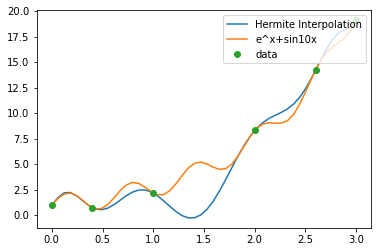

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#hermite
def hdiff(x, y, yprime):
    m = x.size # here m is the number of data points. Note n=m-1
    # and 2n+1=2m-1
    l = 2*m
    z = np.zeros(l)
    a = np.zeros(l)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    for i in range(m):
        a[2*i] = y[i]
        a[2*i+1] = y[i]
    for i in np.flip(np.arange(1, m)): # computes the first divided
        # differences using derivatives
        a[2*i+1] = yprime[i]
        a[2*i] = (a[2*i]-a[2*i-1]) / (z[2*i]-z[2*i-1])
    a[1] = yprime[0]
    for j in range(2, l): # computes the rest of the divided differences
        for i in np.flip(np.arange(j, l)):
            a[i]=(a[i]-a[i-1]) / (z[i]-z[i-j])
    return a
def hermite(x, y, yprime, w):
    m = x.size # here m is the number of data points. not the
    # degree of the polynomial
    a = hdiff(x, y, yprime)
    z = np.zeros(2*m)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    sum = a[0]
    pr = 1.0
    for j in range(2*m-1):
        pr *= w-z[j]
        sum += a[j+1]*pr
    return sum

print(hdiff(np.array([0,0.4,1,2,2.6,3]),np.array([1,0.735,2.17,8.30,14.2,19.1]), np.array([11,-5.04,-5.67,11.5,19.9,21.6])))
#plotting
xaxis = np.linspace(0,3)
x = np.array([0,0.4,1,2,2.6,3])
y = np.array([1,0.735,2.17,8.30,14.2,19.1])
yprime = np.array([11,-5.04,-5.67,11.5,19.9,21.6])
funct = np.exp(xaxis)+np.sin(10*xaxis)
interp = hermite(x, y, yprime, xaxis)
plt.plot(xaxis, interp, label='Hermite Interpolation')
plt.plot(xaxis, funct, label="e^x+sin10x")
plt.plot(x, y, 'o', label='data')
plt.legend(loc='upper right');

# Problem 5 (MATH 5660 ONLY)

Limacon is a curve, named after a French word for snail, which appears in the study of planetary motion. The polar equation for the curve is $r=1+c\sin\theta$ where $c$ is a constant. Below is a plot of the curve when $c=1$.

The $x,y$ coordinates of the dots on the curve are displayed in the following table:

| $x$ | 0 | 0.5 | 1 | 1.3 | 0 | -1.3 | -1 |  -0.5 | 0 |
| --- | --- | --- | --- |---|---|---|---|---|---|
|$y$ | 0 | -0.25 | 0 | 0.71 | 2 | 0.71 | 0 | -0.25 | 0 |


Recreate the limacon above, by applying the spline interpolation for plane curves approach used in _Arya and the letter NUH_ example to the points given in the table.